# Read Dataset from Dataset.zip

In [ ]:
!unzip Dataset.zip

In [12]:
import os
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [7]:
binary_ratings = {}
range_ratings = {}
with open('binary_ratings_mean.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line_split = line.split(',')
        binary_ratings[line_split[0].strip()] = float(line_split[1].strip())
with open('range_ratings_mean.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line_split = line.split(',')
        range_ratings[line_split[0].strip()] = float(line_split[1].strip())

In [8]:
dataset = defaultdict(dict)
all_images = {}
for split in ['Train', 'Valid', 'Test']:
    for label in ['Funny', 'Not_Funny']:
        dataset[split][label] = []
        folder_path = os.path.join('Dataset', split, label)
        for file in os.listdir(folder_path):
            data_point = {}
            data_point['file_path'] = os.path.join(folder_path, file)
            data_point['filename'] = file.strip()
            data_point['binary_rating'] = binary_ratings[file.strip()]
            data_point['range_rating'] = range_ratings[file.strip()]
            all_images[file.strip()] = data_point
            dataset[split][label].append(data_point)

In [9]:
mod2org = json.load(open('mod2org.json', 'r'))
len(mod2org)

1416

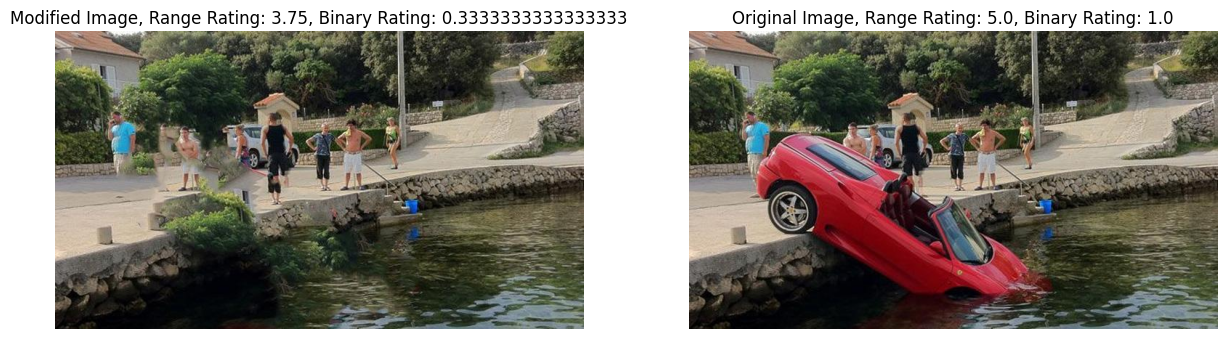

In [17]:
mod_file = list(mod2org.keys())[3]
mod, org = mod_file, mod2org[mod_file]

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread(all_images[mod]['file_path']))
plt.title(f'Modified Image, Range Rating: {all_images[mod]["range_rating"]}, Binary Rating: {all_images[mod]["binary_rating"]}')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(plt.imread(all_images[org]['file_path']))
plt.title(f'Original Image, Range Rating: {all_images[org]["range_rating"]}, Binary Rating: {all_images[org]["binary_rating"]}')
plt.axis('off')
plt.show()